# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Early Stopping

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Setting up Early Stopping</ol>
<ol>7. Training the model using Early Stopping</ol>
<ol>8. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# unzipping the Dataset.zip file
# !unzip /content/drive/My\ Drive/Dataset.zip

In [6]:
# reading the csv file
data = pd.read_csv('../../data/emergency_classification.csv')

In [7]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [8]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [9]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../../data/images_vehicles/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [10]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the data

In [11]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [12]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [13]:
# normalizing the pixel values
X = X / X.max()

In [14]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [15]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [16]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [17]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [18]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [19]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Setting up Early Stopping

- **monitor**: Quantity to be monitored.
- **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
- **patience**: Number of epochs with no improvement after which training will be stopped.
- **verbose**: verbosity mode.
- **mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.  (Would sert to max is measuring accuracy.)
- **baseline**: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
- **restore_best_weights**: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

In [21]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [32]:
# setting up early stopping
# 
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

## 7. Training the model using Early Stopping

In [33]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 1s 110ms/step - loss: 0.4986 - accuracy: 0.7892 - val_loss: 0.5688 - val_accuracy: 0.7054
Epoch 2/100
13/13 [==============================] - 1s 97ms/step - loss: 0.4951 - accuracy: 0.7904 - val_loss: 0.5632 - val_accuracy: 0.7110
Epoch 3/100
13/13 [==============================] - 1s 94ms/step - loss: 0.4900 - accuracy: 0.8044 - val_loss: 0.5564 - val_accuracy: 0.7082
Epoch 4/100
13/13 [==============================] - 1s 93ms/step - loss: 0.4890 - accuracy: 0.8032 - val_loss: 0.5665 - val_accuracy: 0.7068
Epoch 5/100
13/13 [==============================] - 1s 90ms/step - loss: 0.4860 - accuracy: 0.7989 - val_loss: 0.5678 - val_accuracy: 0.6997
Epoch 6/100
13/13 [==============================] - 1s 93ms/step - loss: 0.4821 - accuracy: 0.8068 - val_loss: 0.5730 - val_accuracy: 0.6955
Epoch 7/100
13/13 [==============================] - 1s 94ms/step - loss: 0.4784 - accuracy: 0.8056 - val_loss: 0.5614 - val_accuracy: 0.7068
Epoch

Stopped at epoch 15 because the val_loss has not decreased by 0.01 for 5 epochs.

## 8. Evaluating model performance 

In [31]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7067988668555241 %


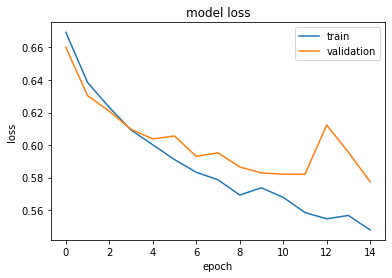

In [25]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

![alt text](https://drive.google.com/uc?id=1Z-ceA9CQH5W4ecusIyzqLLJn2djR8vQb)

## Hyperparameter tuning for Early Stopping (Increasing the patience value)

In [26]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [27]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [28]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 2s 136ms/step - loss: 0.6647 - accuracy: 0.5954 - val_loss: 0.6705 - val_accuracy: 0.5694
Epoch 2/100
13/13 [==============================] - 1s 102ms/step - loss: 0.6319 - accuracy: 0.6403 - val_loss: 0.6326 - val_accuracy: 0.6431
Epoch 3/100
13/13 [==============================] - 1s 103ms/step - loss: 0.6096 - accuracy: 0.6731 - val_loss: 0.6046 - val_accuracy: 0.6856
Epoch 4/100
13/13 [==============================] - 1s 92ms/step - loss: 0.5964 - accuracy: 0.7084 - val_loss: 0.5971 - val_accuracy: 0.6941
Epoch 5/100
13/13 [==============================] - 1s 96ms/step - loss: 0.5820 - accuracy: 0.7199 - val_loss: 0.5925 - val_accuracy: 0.6870
Epoch 6/100
13/13 [==============================] - 1s 92ms/step - loss: 0.5757 - accuracy: 0.7278 - val_loss: 0.5873 - val_accuracy: 0.6941
Epoch 7/100
13/13 [==============================] - 1s 95ms/step - loss: 0.5684 - accuracy: 0.7309 - val_loss: 0.5926 - val_accuracy: 0.6955
Epo

In [29]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7067988668555241 %


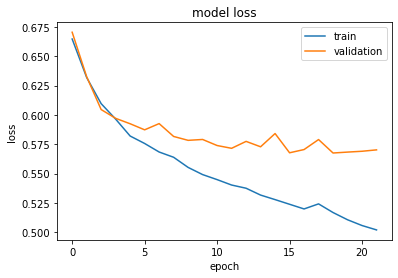

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()